<a href="https://colab.research.google.com/github/MxsPierre/Inteligencia-Artificial-M-a-Contreras/blob/main/ARBOL%20DE%20DECISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mia Contreras,2006081
#N4, ARBOL DE DECISION

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import random

In [6]:
#cargaConjuntoDatos
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'"id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",\r\n842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\r\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\r\n84300903,M,1

In [8]:
data_path = 'data.csv'
data = pd.read_csv(data_path)
print(len(data))

569


In [14]:
# Preprocesamiento
data = data.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Características (X_train):")
print(X_train.head())
print("\n Etiquetas (y_train):")
print(y_train.head())

Características (X_train):
             id  radius_mean  texture_mean  perimeter_mean  area_mean  \
68     859471.0        9.029         17.33           58.79      250.5   
181    873593.0       21.090         26.57          142.70     1311.0   
63     859196.0        9.173         13.86           59.20      260.9   
248  88466802.0       10.650         25.22           68.01      347.0   
60     858970.0       10.170         14.88           64.55      311.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
68           0.10660           0.14130         0.31300              0.04375   
181          0.11410           0.28320         0.24870              0.14960   
63           0.07721           0.08751         0.05988              0.02180   
248          0.09657           0.07234         0.02379              0.01615   
60           0.11340           0.08061         0.01084              0.01290   

     symmetry_mean  ...  radius_worst  texture_worst  perim

In [15]:
#entrenamiento
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
train_accuracy = model.score(X_train, y_train)
print("Exactitud de entrenamiento:", train_accuracy)

Exactitud de entrenamiento: 1.0


In [22]:
#predicciones
y_pred = model.predict(X_test)

In [21]:
y_pred = model.predict(X_test)
random_index = random.randint(0, len(y_test)-1)

print("Índice random:", random_index)
print("Predicción:", y_pred[random_index])
print("Etiqueta real:", y_test.iloc[random_index])

Índice random: 31
Predicción: B
Etiqueta real: B


In [24]:
#exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud: ", accuracy)

print("\n Reporte de clasificacion:")
print(classification_report(y_test, y_pred))

Exactitud:  0.9385964912280702

 Reporte de clasificacion:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



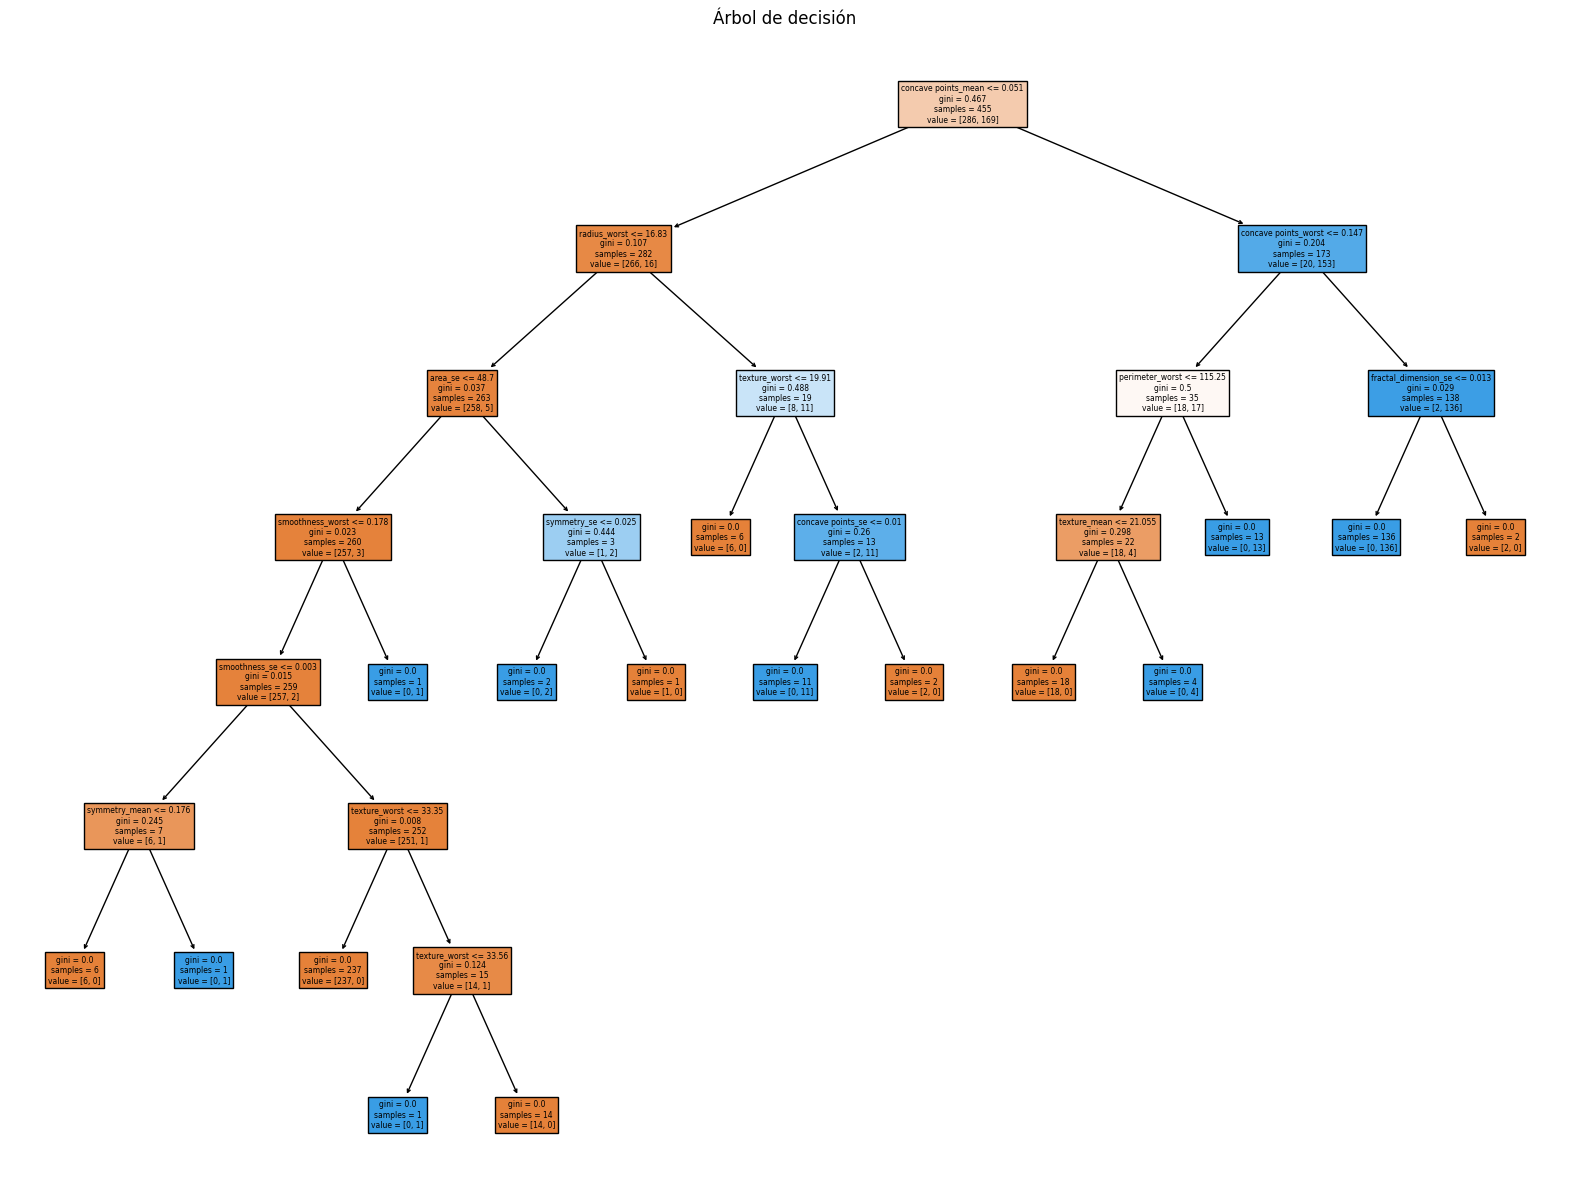

In [29]:
# Visualización
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=X.columns.tolist())
plt.title("Árbol de decisión")
plt.savefig("decision_tree.png", dpi=300)
plt.show()